In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

In [2]:
ppm = pd.read_csv('/Users/anushadas/Desktop/DSEMT/nobsonlyds_Project/maunaloa_co2ppm.txt', sep=",",  index_col=False)

In [3]:
ppm

,year,month,decimal date,average,interpolated,trend,ndays
0,1958,3,1958.2027,315.70,314.43,-1,-9.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99
...,...,...,...,...,...,...,...
760,2021,7,2021.5417,416.96,416.63,30,0.71
761,2021,8,2021.6250,414.47,416.50,26,0.72
762,2021,9,2021.7083,413.30,416.90,27,0.29
763,2021,10,2021.7917,413.93,417.31,29,0.35


ppm['day']=np.array('01')
ppm['date']=pd.to_datetime(ppm[["year", "month", "day"]])
ppm.set_index('date',inplace = True)

In [4]:
ppm

,year,month,decimal date,average,interpolated,trend,ndays
0,1958,3,1958.2027,315.70,314.43,-1,-9.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99
...,...,...,...,...,...,...,...
760,2021,7,2021.5417,416.96,416.63,30,0.71
761,2021,8,2021.6250,414.47,416.50,26,0.72
762,2021,9,2021.7083,413.30,416.90,27,0.29
763,2021,10,2021.7917,413.93,417.31,29,0.35


In [5]:
temp = pd.read_csv('/Users/anushadas/Desktop/DSEMT/nobsonlyds_Project/GlobalAverageMonthly.csv')
temp.head()

,Year,Month,Average,Uncertainty
0,1850,1,-0.760,0.435
1,1850,2,-0.207,0.420
2,1850,3,-0.370,0.353
3,1850,4,-0.605,0.284
4,1850,5,-0.632,0.293


In [6]:
temp.rename(columns={'Average': 'avgTemp'}, inplace=True)

In [7]:
ppm.rename(columns={'year': 'Year', 'month': 'Month', 'average': 'avgCO2', 'interpolated': "adjCO2" }, inplace=True)

In [8]:
df = pd.merge(ppm,temp,on=['Year','Month'],how='inner')
df

,Year,Month,decimal date,avgCO2,adjCO2,trend,ndays,avgTemp,Uncertainty
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,0.115,0.067
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,0.031,0.093
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,0.073,0.074
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.068,0.076
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.015,0.088
...,...,...,...,...,...,...,...,...,...
760,2021,7,2021.5417,416.96,416.63,30,0.71,0.926,0.038
761,2021,8,2021.6250,414.47,416.50,26,0.72,0.917,0.044
762,2021,9,2021.7083,413.30,416.90,27,0.29,1.008,0.039
763,2021,10,2021.7917,413.93,417.31,29,0.35,1.066,0.041


In [9]:
df['Day']=np.array('01')

df['Date']=pd.to_datetime(df[["Year", "Month", "Day"]])
df.set_index('Date',inplace = True)

In [10]:
df=df.drop(columns=['decimal date','trend','ndays','Uncertainty','adjCO2'])

In [11]:
df.head()

,Year,Month,avgCO2,avgTemp,Day
0,1958,3,315.70,0.115,01
1,1958,4,317.45,0.031,01
2,1958,5,317.51,0.073,01
3,1958,6,317.24,-0.068,01
4,1958,7,315.86,-0.015,01


In [12]:
df.tail()

,Year,Month,avgCO2,avgTemp,Day
760,2021,7,416.96,0.926,01
761,2021,8,414.47,0.917,01
762,2021,9,413.30,1.008,01
763,2021,10,413.93,1.066,01
764,2021,11,415.01,0.942,01


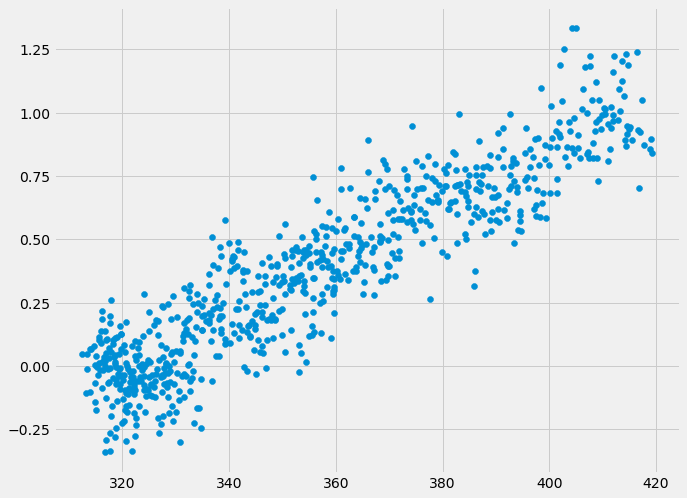

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(df['avgCO2'],df['avgTemp'])
plt.show()

In [14]:
df

,Year,Month,avgCO2,avgTemp,Day
0,1958,3,315.70,0.115,01
1,1958,4,317.45,0.031,01
2,1958,5,317.51,0.073,01
3,1958,6,317.24,-0.068,01
4,1958,7,315.86,-0.015,01
...,...,...,...,...,...
760,2021,7,416.96,0.926,01
761,2021,8,414.47,0.917,01
762,2021,9,413.30,1.008,01
763,2021,10,413.93,1.066,01


In [15]:
# Use numpy to convert to arrays

# Labels are the values we want to predict
labels = np.array(df['avgTemp'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop(columns=['avgTemp'])

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20,
                                                                           random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (612, 4)
Training Labels Shape: (612,)
Testing Features Shape: (153, 4)
Testing Labels Shape: (153,)


In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

baseline_mae= np.mean(errors)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.09 degrees.


In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
baseline_accuracy=accuracy
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.16 %.


In [21]:
import datetime 
# Dates of training values
months = features[:, feature_list.index('Month')]
days = features[:, feature_list.index('Day')]
years = features[:, feature_list.index('Year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'Date': dates, 'avgTemp': labels})

# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]

# Column of dates
test_dates = [str(int(Year)) + '-' + str(int(Month)) + '-' + str(int(Day)) for Year, Month, Day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'Date': test_dates, 'prediction': predictions}) 

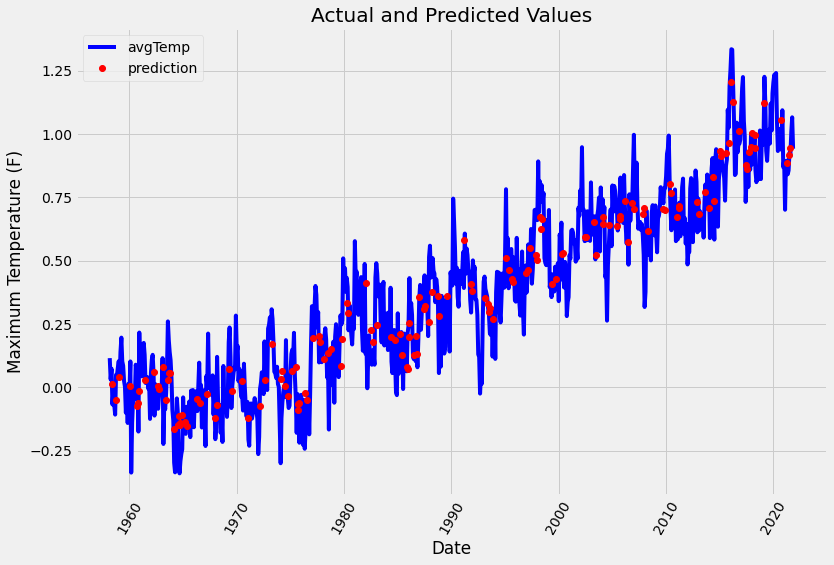

In [22]:
plt.figure(figsize=(12,8))
# Plot the actual values
plt.plot(true_data['Date'], true_data['avgTemp'], 'b-', label = 'avgTemp')

# Plot the predicted values
plt.plot(predictions_data['Date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


In [23]:
rf_new = RandomForestRegressor(n_estimators= 5000, random_state=36)

# Train the model on training data
rf_new.fit(train_features, train_labels);

In [24]:
# Use the forest's predict method on the test data
predictions = rf_new.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

new_baseline_mae= np.mean(errors)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
new_baseline_accuracy=accuracy
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.09 degrees.
Accuracy: 78.42 %.


## Model Improvement

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/anushadas/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [28]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [29]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [30]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_features, train_labels)
evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.0887 degrees.
Accuracy = 79.16%.


In [31]:
best_random = rf_random.best_estimator_
#evaluate(best_random, test_features, test_labels)

predictions = best_random.predict(test_features)
errors = abs(predictions - test_labels)
mape = 100 * np.mean(errors / test_labels)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.2f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

random_mae=np.mean(errors)
random_accuracy = accuracy

Model Performance
Mean Absolute Error: 0.09 degrees.
Accuracy = 77.11%.


In [32]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

In [33]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [34]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [35]:
best_grid = grid_search.best_estimator_

predictions = best_grid.predict(test_features)
errors = abs(predictions - test_labels)
mape = 100 * np.mean(errors / test_labels)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.2f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

grid_mae=np.mean(errors)
grid_accuracy = accuracy

Model Performance
Mean Absolute Error: 0.09 degrees.
Accuracy = 75.29%.


In [36]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_ad = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

grid_search_ad.fit(train_features, train_labels)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [110, 120, None],
                         'max_features': [3, 4], 'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [10],
                         'n_estimators': [75, 100, 125]},
             scoring='neg_mean_absolute_error', verbose=2)

In [37]:
grid_search_ad.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 100}

In [38]:
best_grid_ad = grid_search_ad.best_estimator_
#evaluate(best_grid_ad, test_features, test_labels)

predictions = best_grid_ad.predict(test_features)
errors = abs(predictions - test_labels)
mape = 100 * np.mean(errors / test_labels)
accuracy = 100 - mape
print('Model Performance')
print('Mean Absolute Error: {:0.2f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

grid_ad_mae=np.mean(errors)
grid_ad_accuracy = accuracy

Model Performance
Mean Absolute Error: 0.09 degrees.
Accuracy = 69.07%.


In [39]:

# Create a dataframe for comparison
model_comparison = pd.DataFrame({'model': ['baseline','newBaseline', 'randomSearch','gridSearch','gridSearch2'], 
                                 'error (degrees)':  [baseline_mae, new_baseline_mae, random_mae, grid_mae, grid_ad_mae],
                                 'accuracy': [baseline_accuracy, new_baseline_accuracy, random_accuracy, grid_accuracy, grid_ad_accuracy]})

# Order the dataframe
model_comparison = model_comparison[['model', 'error (degrees)', 'accuracy']]

In [40]:
model_comparison

,model,error (degrees),accuracy
0,baseline,0.088683,79.163263
1,newBaseline,0.088572,78.415148
2,randomSearch,0.091453,77.105293
3,gridSearch,0.092710,75.293725
4,gridSearch2,0.093483,69.074008


choose baseline model

In [41]:
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)


pred = pd.DataFrame({'predicted temp': predictions, 'actual temp': test_labels})

In [42]:
pred

,predicted temp,actual temp
0,0.259210,0.514
1,0.085086,0.248
2,1.056305,0.938
3,0.064672,-0.060
4,0.072809,0.214
...,...,...
148,0.079650,-0.224
149,0.672863,0.647
150,0.202485,0.103
151,0.209233,0.183


In [43]:
forecasted_emissions = pd.read_csv('/Users/anushadas/Desktop/DSEMT/nobsonlyds_Project/forecasted_emissions.csv', sep=',')

In [44]:
forecasted_emissions

,Date,predicted_mean
0,2022-01-01,412.438556
1,2022-02-01,413.291859
2,2022-03-01,414.151823
3,2022-04-01,415.442720
4,2022-05-01,415.972953
...,...,...
103,2030-08-01,427.092863
104,2030-09-01,425.639883
105,2030-10-01,425.755256
106,2030-11-01,427.141637


In [45]:
forecasted_emissions['Date'] =  pd.to_datetime(forecasted_emissions['Date'], format='%Y-%m-%d')

In [46]:
forecasted_emissions

,Date,predicted_mean
0,2022-01-01,412.438556
1,2022-02-01,413.291859
2,2022-03-01,414.151823
3,2022-04-01,415.442720
4,2022-05-01,415.972953
...,...,...
103,2030-08-01,427.092863
104,2030-09-01,425.639883
105,2030-10-01,425.755256
106,2030-11-01,427.141637


In [47]:
forecasted_emissions['Month']= forecasted_emissions.Date.dt.month

In [48]:
forecasted_emissions['Day']= forecasted_emissions.Date.dt.day
forecasted_emissions['Year']= forecasted_emissions.Date.dt.year

In [49]:
forecasted_emissions = forecasted_emissions.drop(columns='Date')

In [50]:
forecasted_emissions.rename(columns={'predicted_mean': 'predicted_CO2'}, inplace=True)

In [51]:
forecasted_emissions = forecasted_emissions[["Year", "Month", "predicted_CO2", "Day"]]
forecasted_emissions

,Year,Month,predicted_CO2,Day
0,2022,1,412.438556,1
1,2022,2,413.291859,1
2,2022,3,414.151823,1
3,2022,4,415.442720,1
4,2022,5,415.972953,1
...,...,...,...,...
103,2030,8,427.092863,1
104,2030,9,425.639883,1
105,2030,10,425.755256,1
106,2030,11,427.141637,1


In [52]:
forecasted_emissions

,Year,Month,predicted_CO2,Day
0,2022,1,412.438556,1
1,2022,2,413.291859,1
2,2022,3,414.151823,1
3,2022,4,415.442720,1
4,2022,5,415.972953,1
...,...,...,...,...
103,2030,8,427.092863,1
104,2030,9,425.639883,1
105,2030,10,425.755256,1
106,2030,11,427.141637,1


In [53]:
# Use numpy to convert to arrays

test_features= forecasted_emissions

# Saving feature names for later use
feature_list = list(test_features.columns)

# Convert to numpy array
test_features = np.array(test_features)

In [54]:

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)


pred = pd.DataFrame({'predicted temp': predictions})
pred

,predicted temp
0,0.997846
1,0.983065
2,1.000005
3,0.962304
4,0.933695
...,...
103,0.890837
104,0.895235
105,0.919644
106,0.907553


In [55]:
new_df = pd.concat([forecasted_emissions, pred], axis=1)

In [56]:
new_df

,Year,Month,predicted_CO2,Day,predicted temp
0,2022,1,412.438556,1,0.997846
1,2022,2,413.291859,1,0.983065
2,2022,3,414.151823,1,1.000005
3,2022,4,415.442720,1,0.962304
4,2022,5,415.972953,1,0.933695
...,...,...,...,...,...
103,2030,8,427.092863,1,0.890837
104,2030,9,425.639883,1,0.895235
105,2030,10,425.755256,1,0.919644
106,2030,11,427.141637,1,0.907553


In [57]:
# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]

# Column of dates
test_dates = [str(int(Year)) + '-' + str(int(Month)) + '-' + str(int(Day)) for Year, Month, Day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'Date': test_dates, 'prediction': predictions}) 

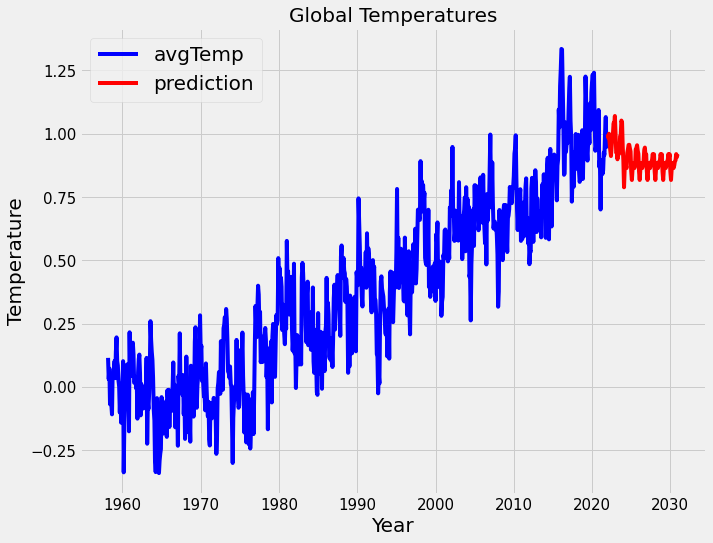

In [58]:
plt.figure(figsize=(10, 8))
#df['avgTemp'].plot(label='temp')
#new_df['predicted temp'].plot(label='forecasted_temp')
plt.plot(true_data['Date'], true_data['avgTemp'], 'b-', label = 'avgTemp')
plt.plot(predictions_data['Date'], predictions_data['prediction'], 'r-', label = 'prediction')

#plt.plot(new_df['Year'], new_df['predicted temp'], label='forecasted', color='red')
#plt.axhline(y=0, color='black', linestyle='-', label = 'average')
plt.title('Global Temperatures', size=20)
plt.xlabel('Year', size=20)
plt.ylabel('Temperature', size=20)
plt.legend(prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()